In [10]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import configparser
from Bio import SeqIO, pairwise2

%matplotlib inline

In [20]:
class FastQ():
    
    def __init__(self, filename):
        self.filename = filename
        self._sequences = {}
    
    def parse_file(self, num_lines=100):
        with open(self.filename, 'r') as f:
            data = []

            for i, record in enumerate(SeqIO.parse("TCRBOA1-N-WEX.read1.fastq", "fastq")):
                data.append(str(record.seq))
                if i == num_lines:
                    break
                
            # Now the lines you want are alternating, so you can make a dict
            # from key/value pairs of lists data[0::2] and data[x]
        
        self._sequences = data
        return self._sequences

In [21]:
config = configparser.ConfigParser()
config.read('config.ini')
Ndata = config['data']['ndata']
Tdata = config['data']['tdata']

fastN = FastQ(Ndata)
fastT = FastQ(Tdata)

/Users/freddiev4/.virtualenvs/bio/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: You passed a bytestring as `filenames`. This will not work on Python 3. Use `cp.read_file()` or switch to using Unicode strings across the board.
  from ipykernel import kernelapp as app


In [22]:
fastN.parse_file(num_lines=1000)
fastT.parse_file(num_lines=1000)

['TCTGGTTTTCGGAATGTGGGAGGAGGATTTGTAGGAATCATGAAGATTGCCTGGTTAGAACAAACAAACAAACAAAAAGATCTGGTAAAATAAAAGTAATG',
 'TGGGACAGAGATGACCCGGCTGAGGCNANGCCGGCTCCAGCACTGACCTTGAGCTCTTGGGAGACCCGGGCCTTCTGCCGGTACACGGAGTACAGGGCGGN',
 'ATTTGCTTCGTGTAAGATCAGATTTTTGAGAGCACATGTATTAAGTGTTAGAATGTTTCAATTTGAAATTAGAGCAAGGGATAATCCCAATAGCAAGATAA',
 'CTTGGACAAACATCCCGCCACATCAGAAGGAGAGGGAGGAACATCTGCGTTTCTATCACCAGCAGTTCCAACAGCCACCTCTCCTCCAACAGAAGTTAAAA',
 'TCTATCTTGGATGCCTTTACTTCCTGCTGCCCACTGAGAAGCTTCATCAGGTGGCCTGTCCTGGAGATGAGCTTGGCACAGGTCACTTGCACATGGGCCCC',
 'AGGACATGTCTAAATACATATTCTCACCTTATTTGGCGCCATCGATGTTCACAGACCCAGTCATTGCCACAAGTAGTGTCTGGATTAATAGTAACTTCTTT',
 'GCTGTCCTGGGGAAGTGGGGACAGGTATGTGTGTGTGCAAGTATCTCACCATCTGGGTGCTTCTCTCGGGTCATGAGGGAGAGGATAGTCTTGGCATAGTC',
 'AAGTGCTTGTTGAATGGAATATNCANNTNGATTCTGAATTATATGGCATAGACAAGGAAGAGGGAAAAGAGCTGGGGCAGCCACCTTGGGCACAATAAGAN',
 'TTTTTCACGGTGACATCCTTGCTTACCTGTCCAGGGCCATGCTGGTTGGCATACTCCTCCCAAACCCGCGGACCCCCATCTGACGGAAATATGGAATGCAN',
 'CAAGTGAAGATTCACAGCAGTCTGAGGAAGGCACTGAAACGAAA

In [24]:
# T_dicts = []
# N_dicts = []

# for ix, key in enumerate(fastT._sequences):
#     T_dicts.append(Counter(fastT._sequences[key]))
#     if ix == 1000:
#         break

# for ix, key in enumerate(fastN._sequences):
#     N_dicts.append(Counter(fastN._sequences[key]))
#     if ix == 1000:
#         break
    


# T_frequencies = {}
# for d in T_dicts:
#     for key in d:
#         if key not in T_frequencies and key in 'ACGT':
#             T_frequencies[key] = d[key]
#         elif key not in 'ACGT':
#             pass
#         else:
#             T_frequencies[key] += d[key]

# T_frequencies['total'] = sum([T_frequencies[key] for key in T_frequencies])
# print("T:", sorted(T_frequencies))
# print(sorted([T_frequencies[key] / T_frequencies['total'] for key in T_frequencies if key != 'total']))




# N_frequencies = {}
# for d in N_dicts:
#     for key in d:
#         if key not in N_frequencies and key in 'ACGT':
#             N_frequencies[key] = d[key]
#         elif key not in 'ACGT':
#             pass
#         else:
#             N_frequencies[key] += d[key]
    
# N_frequencies['total'] = sum([N_frequencies[key] for key in N_frequencies])
# print("N:", sorted(N_frequencies))
# print(sorted([N_frequencies[key] / N_frequencies['total'] for key in N_frequencies if key != 'total']))

## Neural Net
You'd need to feed the neural net the diseased cell sequencing, and also which parts of those sequencing indicate that it's diseased. 


Or rather, the normal sequencing, and which sections of the sequencing map to the diseased sequencing sections.

In [26]:
vals = [len(fastN._sequences)]
x = []
for i in [fastN._sequences[key] for key in fastN._sequences]:
    for j in [fastT._sequences[key] for key in fastT._sequences]:
        if len(i) == len(j):
            x.append([k for k in range(len(i)) if i[k] != j[k]])

In [27]:
Nlocal_frequencies = {}

for key in fastN._sequences:
    if key not in Nlocal_frequencies:
        Nlocal_frequencies[fastN._sequences[key]] = [(X, Counter(fastN._sequences[key])[X]) for X in Counter(fastN._sequences[key]) if X in 'ACGT']

Nlocal_frequencies

{'AAAAAGAAATAGGATCTTTTTCCTTCAGCAAACTAGATTTGACTTGCAATCTTCTGACTTCCTGTGTATGTTTTTATTGGGACAGGAAACCTTCAAGCTCC\n': [('A',
   29),
  ('C', 20),
  ('T', 35),
  ('G', 17)],
 'AAAAATATATATATATACTCACTGAATTGGCATTTGTTGGGTTTGGCCAAGGTCTACCACCACCTGGACCCCTACAAAACAATTTGATAAATGAAATTTTA\n': [('A',
   36),
  ('C', 19),
  ('T', 31),
  ('G', 15)],
 'AAAAATGTTCCAAGGAAAAGGTNGANNCNATTGTCTCTTTCTCTTTCTGCTCTGATGTAGTGCGTGTGCTAAGCTCAGGTCTGAGCACTGGCGGATCCCCN\n': [('A',
   21),
  ('C', 22),
  ('G', 24),
  ('T', 29)],
 'AAAATGTGCTTCTTACAGGAATATAAATAGTTTCTGGAAAGGACACTGACAACTTCAAAGCAAAATGAAGCTCTTTTGGTTGCTTTTCACCATTGGGTTCT\n': [('A',
   32),
  ('C', 17),
  ('T', 33),
  ('G', 19)],
 'AAACCAGTTGCTCAACAATCATGGCTATCGCCCATCCCCCATATGTCTGGTAGGTGACACCTCAAGCCACTCGTAACTCCTCCTCCTCCTCCTCCTGTTCC\n': [('A',
   21),
  ('C', 40),
  ('T', 26),
  ('G', 14)],
 'AAAGAAAGCCTGCCATTTAGTGAGAATATACTGGCCAGGTATTTATAGTCTCAAGGTGGGGCATTTTCTGATTTGAGTGGATTTCAGAATCGTGGGCCTTG\n': [('A',
   26),
  ('C', 15),
  ('T', 32),
  ('G', 28)],
 'AAAGACATGAATCTGTAAAT

In [28]:
from Bio import pairwise2

251
251


(array([   1.,    1.,    0.,    0.,    0.,    1.,    5.,   52.,  166.,   25.]),
 array([ 14. ,  19.7,  25.4,  31.1,  36.8,  42.5,  48.2,  53.9,  59.6,
         65.3,  71. ]),
 <a list of 10 Patch objects>)

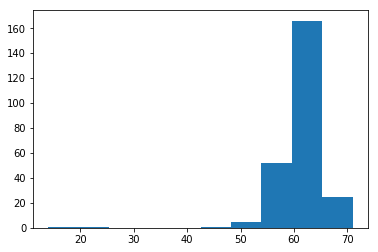

In [37]:
# Needs to be done between N and T sequences
Tlocal_frequencies = {}

for key in fastT._sequences:
    if key not in Tlocal_frequencies:
        Tlocal_frequencies[fastT._sequences[key]] = [(X, Counter(fastT._sequences[key])[X]) for X in Counter(fastT._sequences[key]) if X in 'ACGT']

healthy_seq = list(Nlocal_frequencies.keys())
cancer_seq = list(Tlocal_frequencies.keys())
print(len(cancer_seq))
print(len(healthy_seq))

scores = []

for i, key in enumerate(healthy_seq):
    alignments = pairwise2.align.globalxx(healthy_seq[i], cancer_seq[i])
    scores.append(alignments[0][2])

plt.hist(scores)